Latent Dirichlet Allocation (LDA)の復習(記憶があやふやなので)。

#各パラメータの解釈

$w_i|z_i,\phi^{(z_i)} \sim Discrete(\phi^{(z_i)}) \tag{1}$

$\phi \sim Dirichlet(\beta) \tag{2}$

$z_i|\theta^{(d_i)} \sim Discrete(\theta^{(d_i)}) \tag{3}$

$\theta \sim Dirichlet(\alpha) \tag{4}$

[Griffiths 2002 https://people.cs.umass.edu/~wallach/courses/s11/cmpsci791ss/readings/griffiths02gibbs.pdf]

ここで、$w_i$は単語、$z_i$はトピック、$\theta$はトピックの生成確率、$d_i$は文章を表す。$\alpha$と$\beta$はハイパーパラメータ。トピックの生成確率は文章ごとに別(式3)。つまり文章ごとにトピックの混ざり具合が異なるということ。それぞれのトピックが別々の語彙を持っていて、その語彙に応じて単語が生成され、これが連なって文章が構成されている。
 
　ハイパーパラメータ$\alpha$、$\beta$はそれぞれ、各文章におけるトピックの混ざり具合、各トピックにおける語彙を左右するパラメータとなる。$Dirichlet$分布のパラメータは大きくなればなるほど生成されるベクトルにおける各要素の分散は小さくなる。一方で分散が変動したとしても生成されるベクトルの要素の総和が1になることはかわらない。結果として分散が大きくなることによりスパースなベクトルが生成されやすくなる。つまりハイパーパラメータ$\alpha$、$\beta$はそれぞれ、文章中にどの程度トピックが混ざりあうか、$\beta$はトピックごとにどの程度の単語が含まれるかを表してると解釈できる。応用上は各文章は少ないトピックで表したい、それこそトピックの割合じゃなくてこのトピック！と一意にラベル付けしたい場合は$\alpha$は小さ目、トピックごとの語彙の差がかなりファジー(？)とかいう場合は$\beta$大き目、みたいな選択をすればよいということになる（たぶん）。
 
#Getting Startコピペ
https://pypi.python.org/pypi/lda

In [1]:
import numpy as np
import lda
import lda.datasets
X = lda.datasets.load_reuters()
vocab = lda.datasets.load_reuters_vocab()
titles = lda.datasets.load_reuters_titles()
print X.shape,X.sum()
model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)
model.fit(X)  # model.fit_transform(X) is also available
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 8
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

(395, 4258) 84010
Topic 0: british churchill sale million major letters west
Topic 1: church government political country state people party
Topic 2: elvis king fans presley life concert young
Topic 3: yeltsin russian russia president kremlin moscow michael
Topic 4: pope vatican paul john surgery hospital pontiff
Topic 5: family funeral police miami versace cunanan city
Topic 6: simpson former years court president wife south
Topic 7: order mother successor election nuns church nirmala
Topic 8: charles prince diana royal king queen parker
Topic 9: film french france against bardot paris poster
Topic 10: germany german war nazi letter christian book
Topic 11: east peace prize award timor quebec belo
Topic 12: n't life show told very love television
Topic 13: years year time last church world people
Topic 14: mother teresa heart calcutta charity nun hospital
Topic 15: city salonika capital buddhist cultural vietnam byzantine
Topic 16: music tour opera singer israel people film
Topic 17: 

ちなみにAPIのAttributesのところ、
http://pythonhosted.org/lda/api.html

たぶん

>ndz_ 	(array, shape = [n_samples, ~~n_features~~ => n_topics])

>doc_topic_ 	(array, shape = [n_samples, ~~n_features~~ => n_topics])

だと思う。

In [23]:
print model.ndz_.shape
print model.doc_topic_.shape

(395, 20)
(395, 20)


#トピックの分布を可視化してみる。

0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20


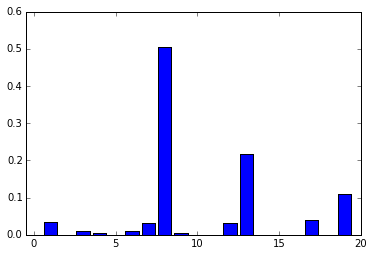

In [22]:
print titles[0]
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(20), model.doc_topic_[0,:], align = "center")
plt.xlim(-0.5,20)
plt.show()